# Aim :
To build model for salary hike

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\Data Science\Assignment_4\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Data Visualisation

<Axes: xlabel='YearsExperience', ylabel='Density'>

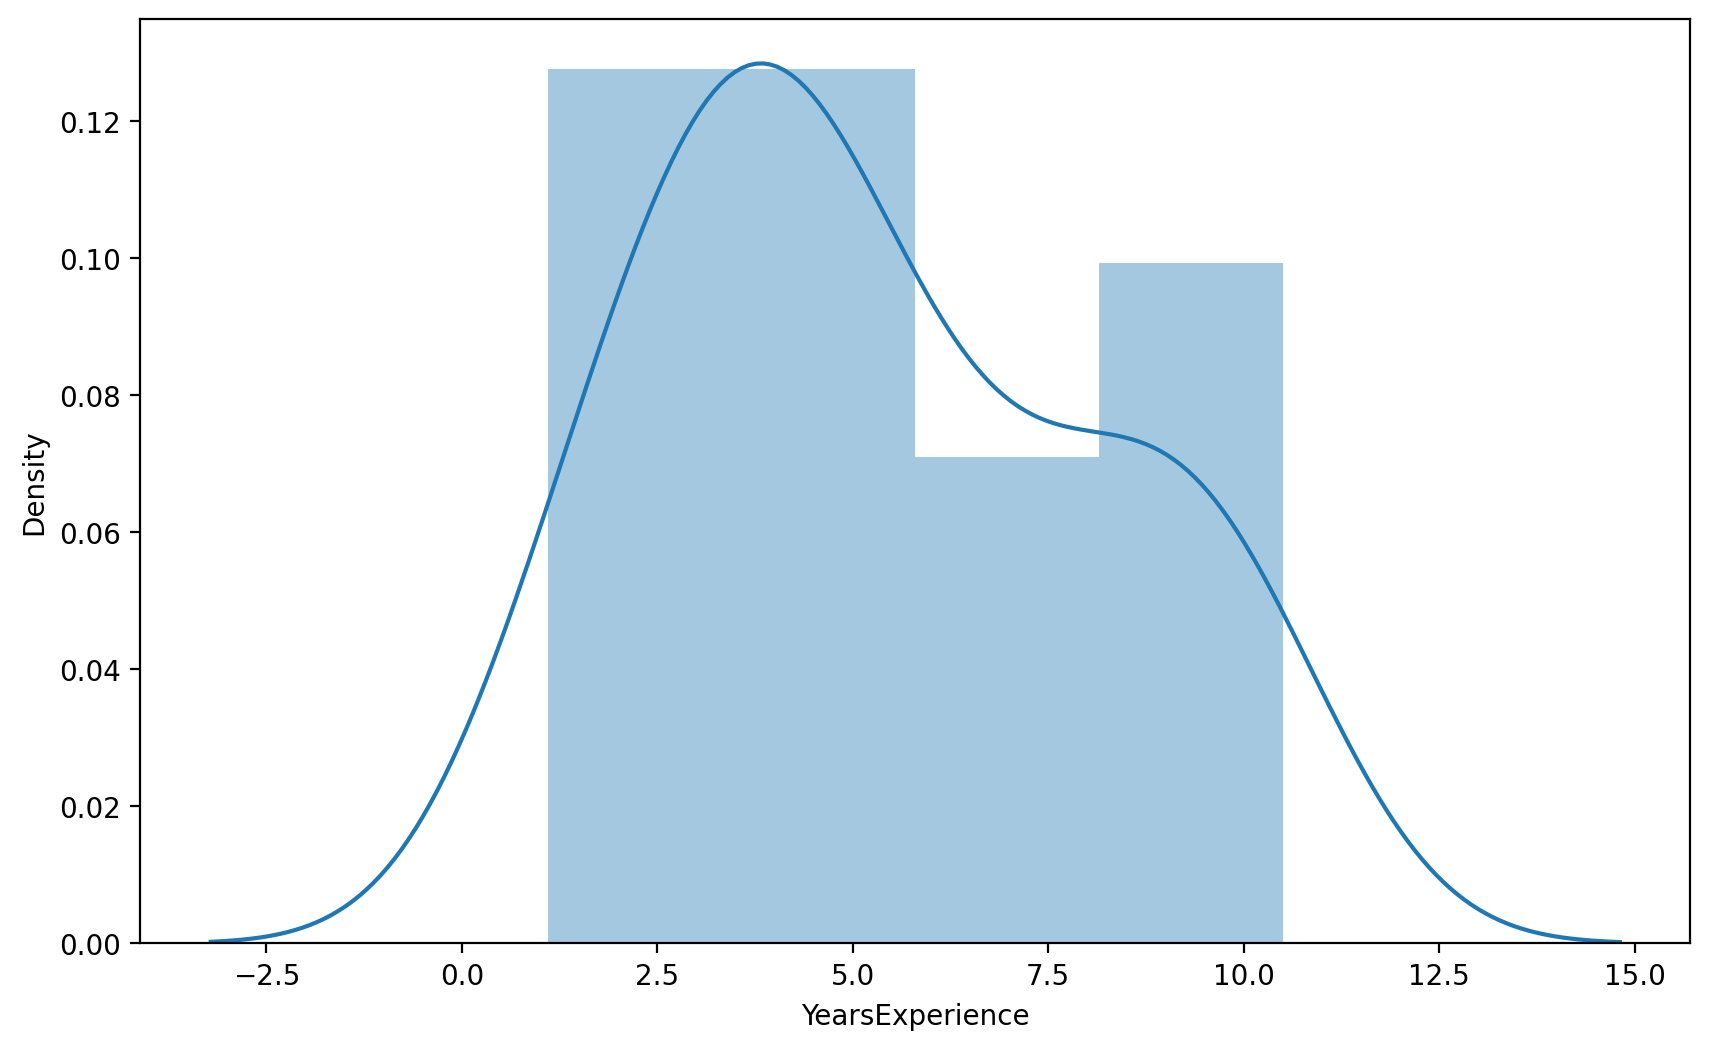

In [30]:
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

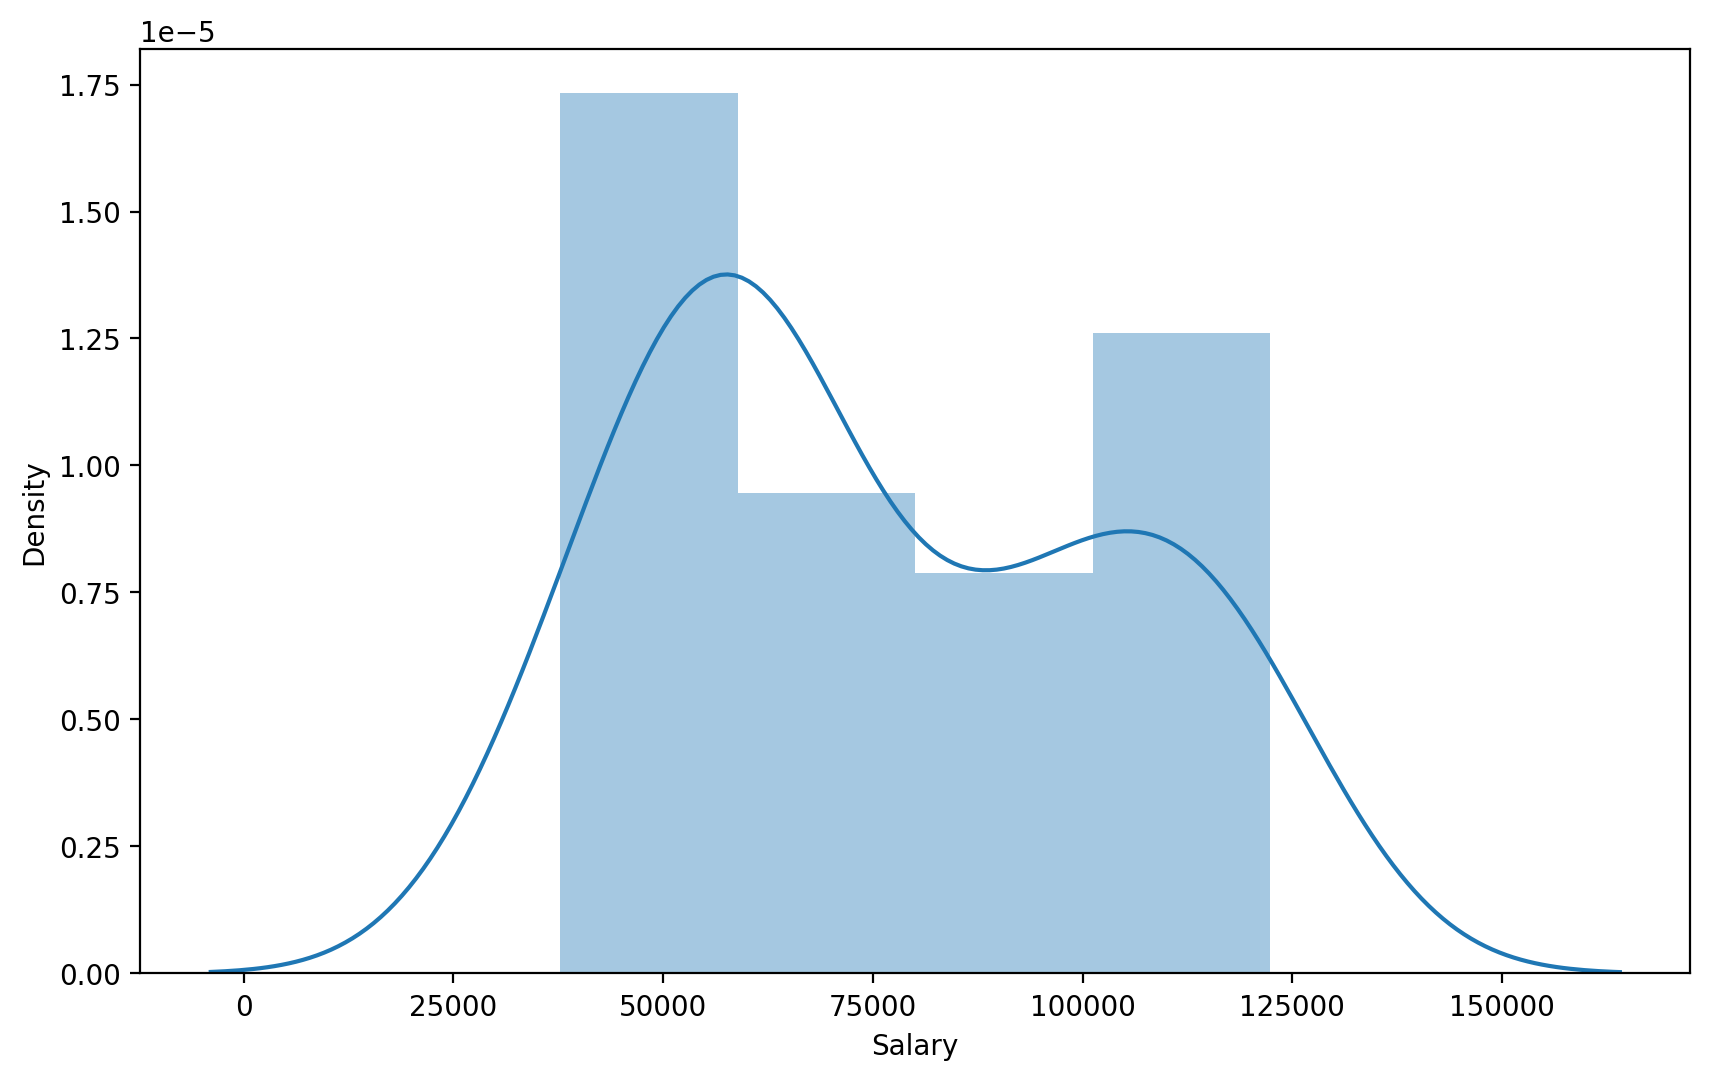

In [31]:
sns.distplot(df['Salary'])

In [32]:
print(df['YearsExperience'].skew(),df['Salary'].skew())

0.37956024064804106 0.35411967922959153


In [33]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

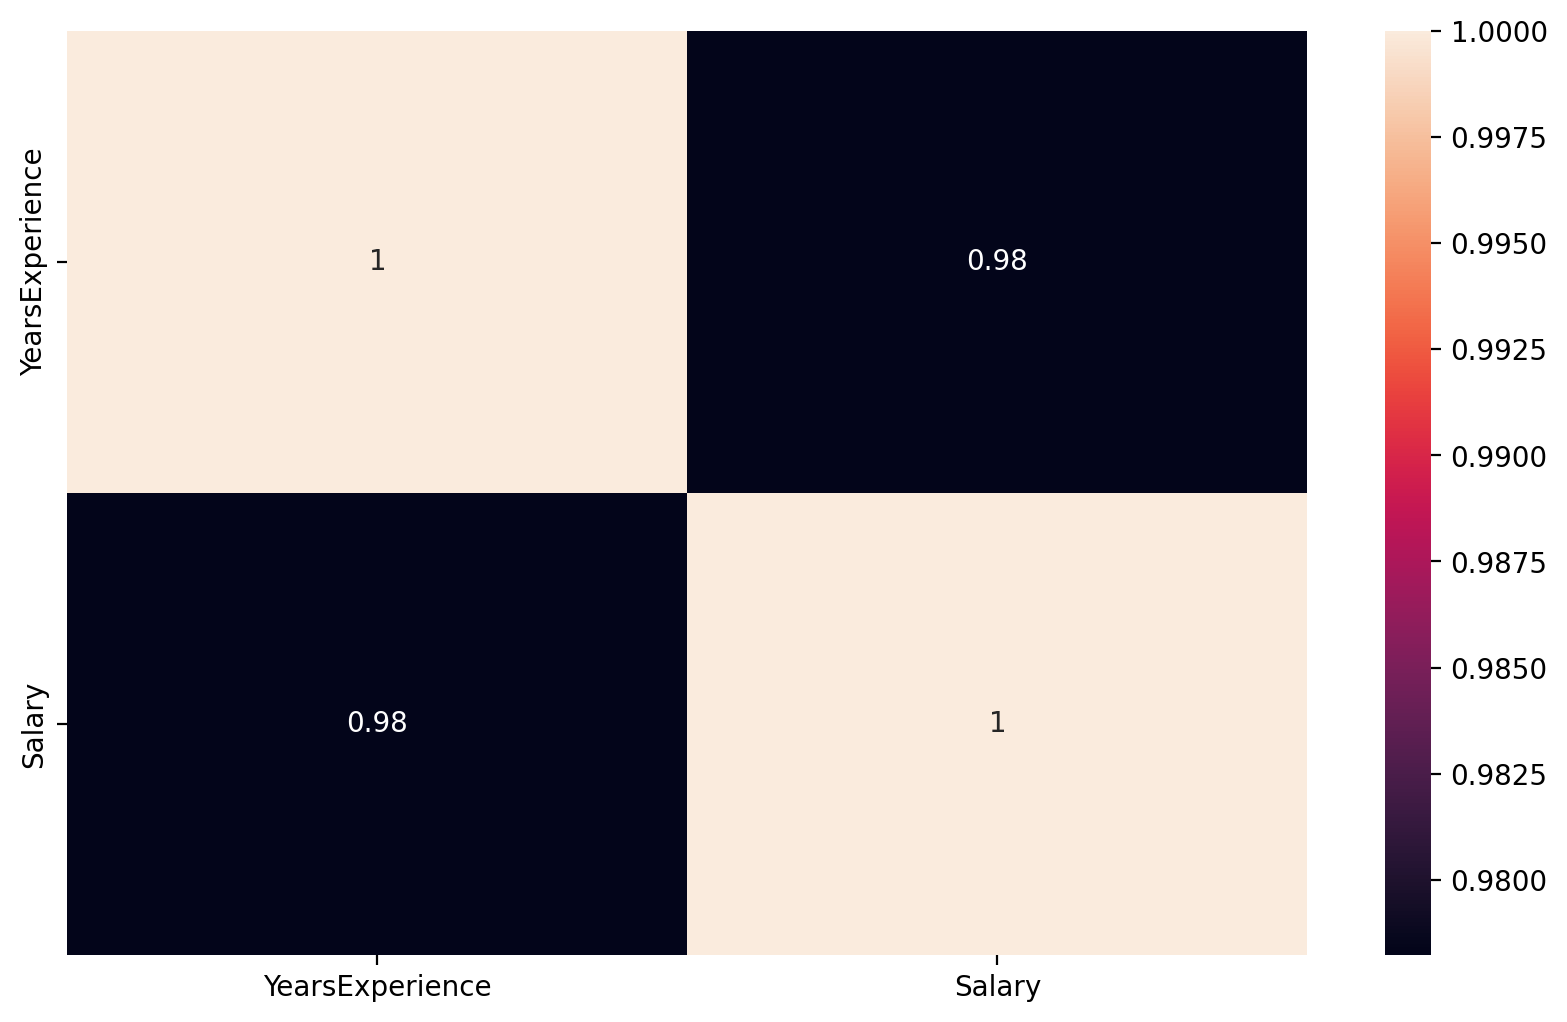

In [36]:
sns.heatmap(df.corr(),annot=True)

# Data Transformation

In [37]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 200

# Log Transformation

In [38]:
df['log_Year'] = np.log(df['YearsExperience'])
df['log_Salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


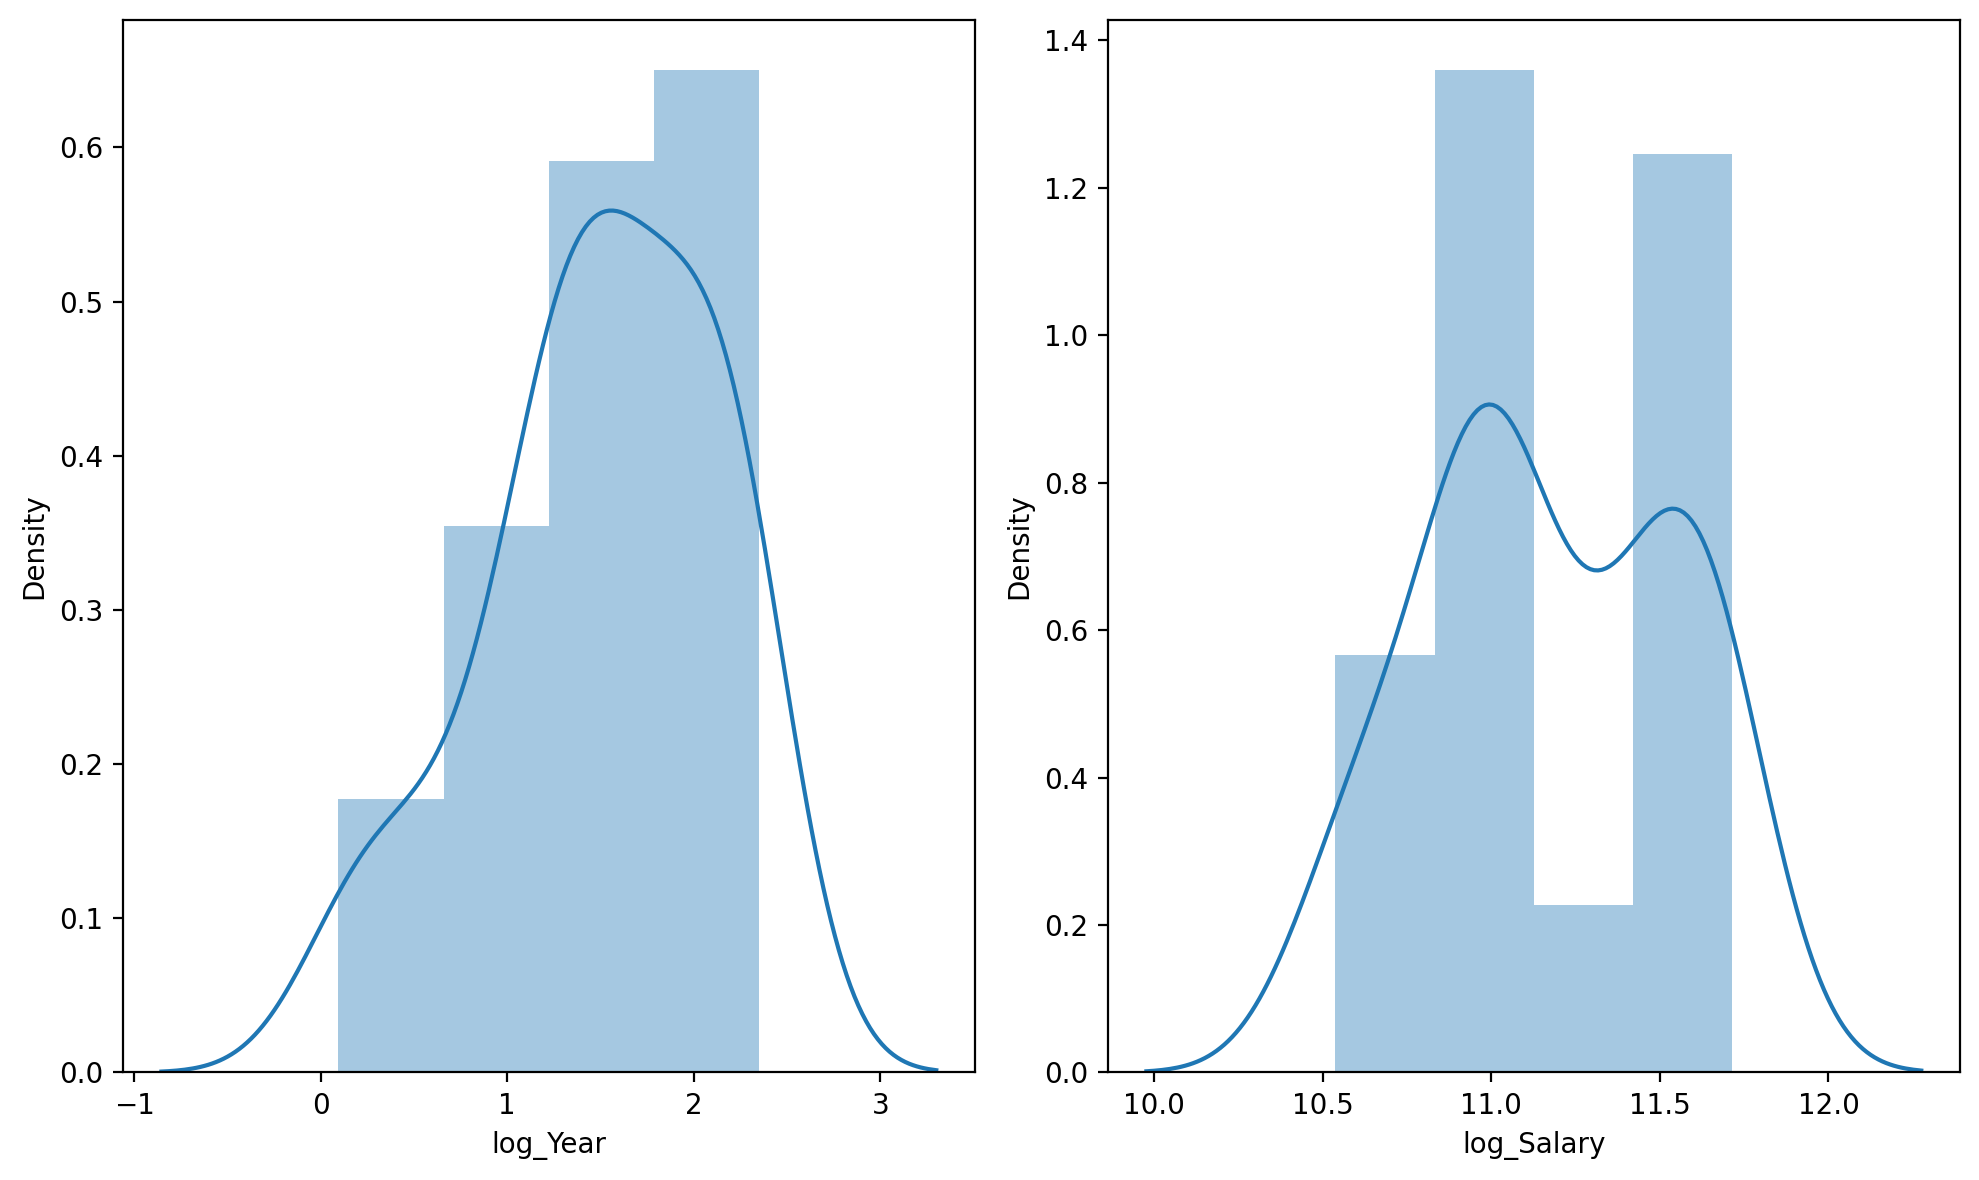

In [39]:
plt.subplot(1,2,1)
sns.distplot(df['log_Year'])

plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])
plt.tight_layout()

In [40]:
print(df['log_Year'].skew(), df['log_Salary'].skew())

-0.6005648582626513 -0.044126086756988495


# Square Root Transformation

In [41]:
df['sqrt_Year'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


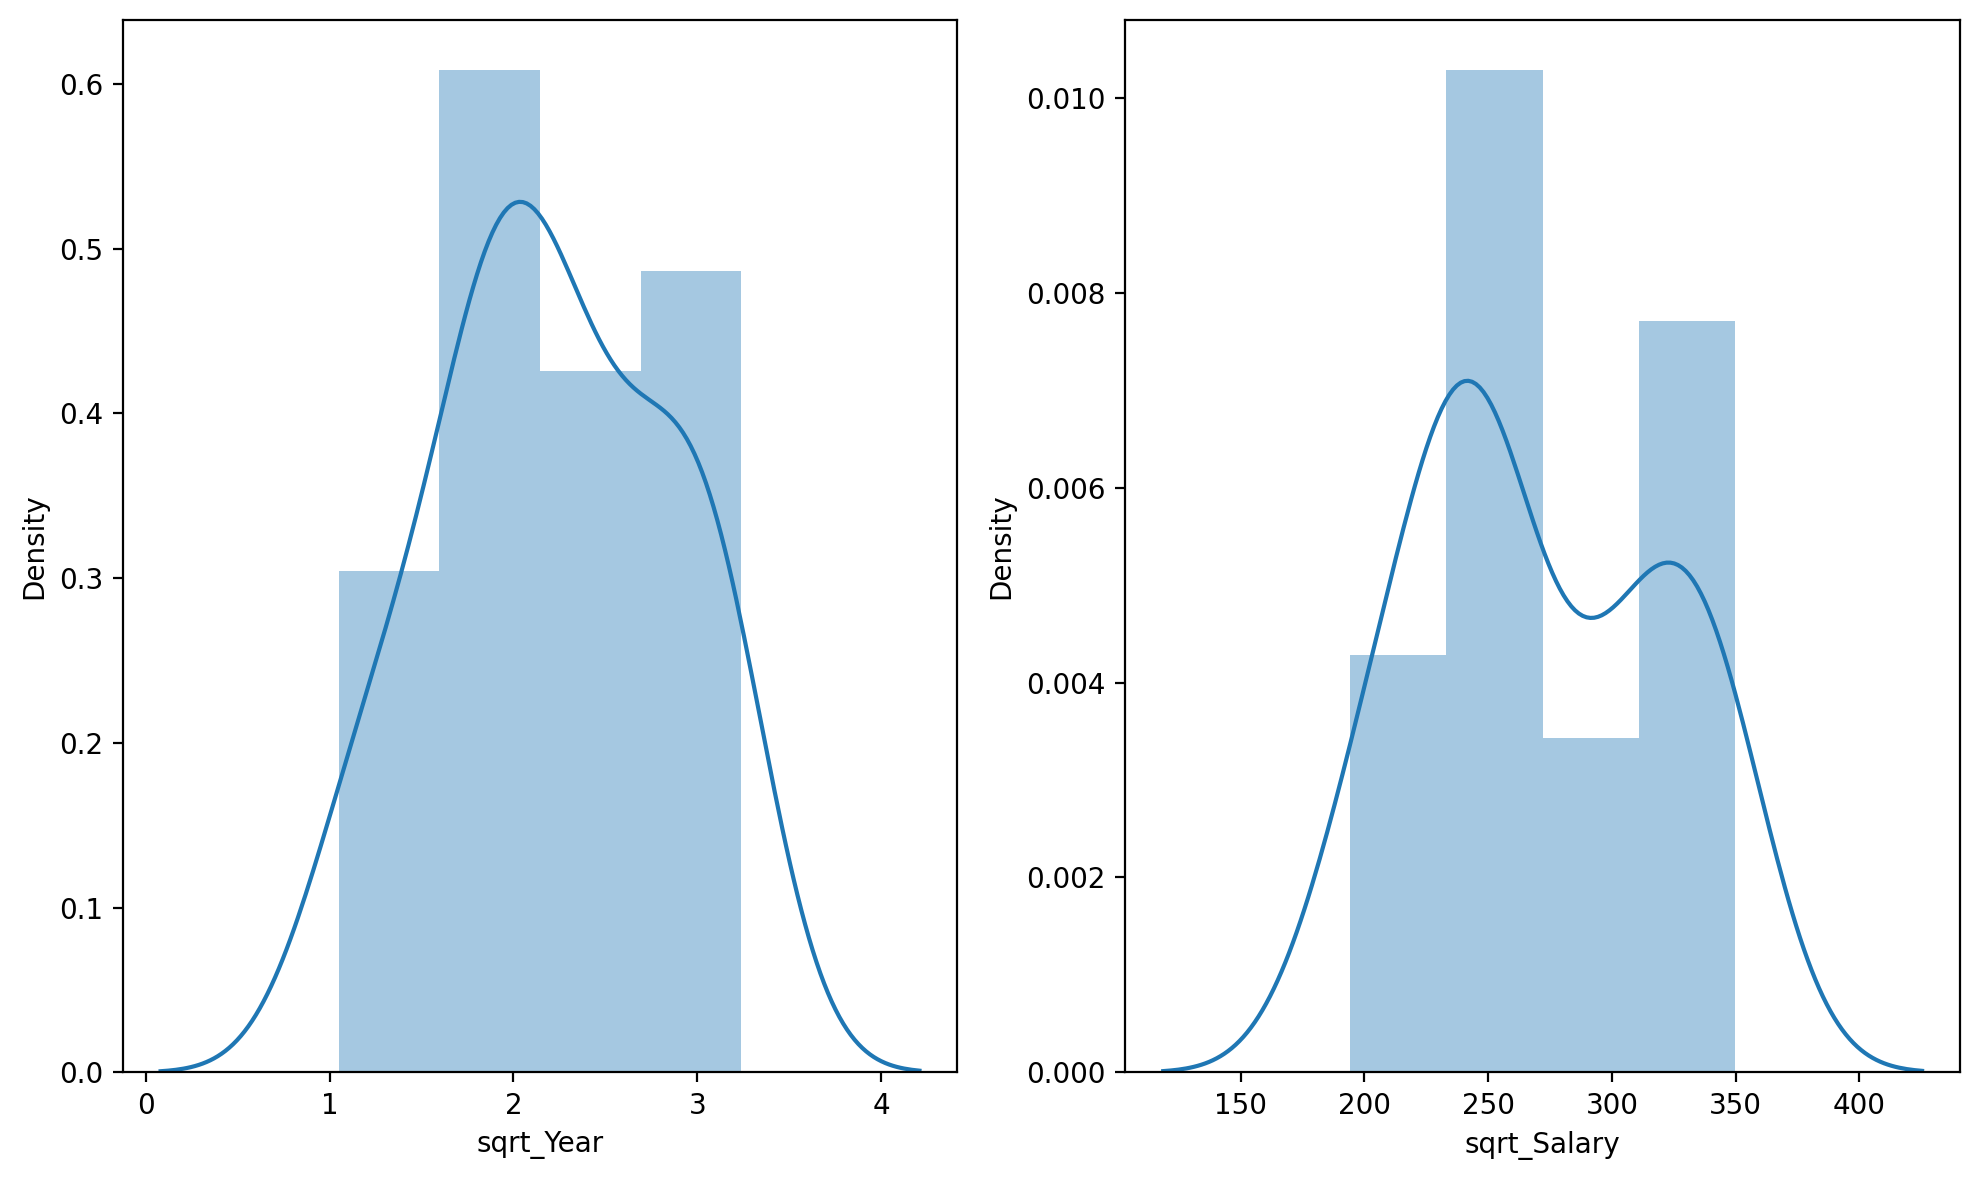

In [42]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Year'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Salary'])
plt.tight_layout()

In [43]:
print(df['sqrt_Year'].skew(), df['sqrt_Salary'].skew())

-0.04919608394250605 0.16904336802767353


# Square Transformation

In [44]:
df['sq_Year'] = np.square(df['YearsExperience'])
df['sq_Salary'] = np.square(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary,sq_Year,sq_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.21,1.547872e+09
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.69,2.134902e+09
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,2.25,1.423628e+09
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,4.00,1.894426e+09
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,4.84,1.591292e+09


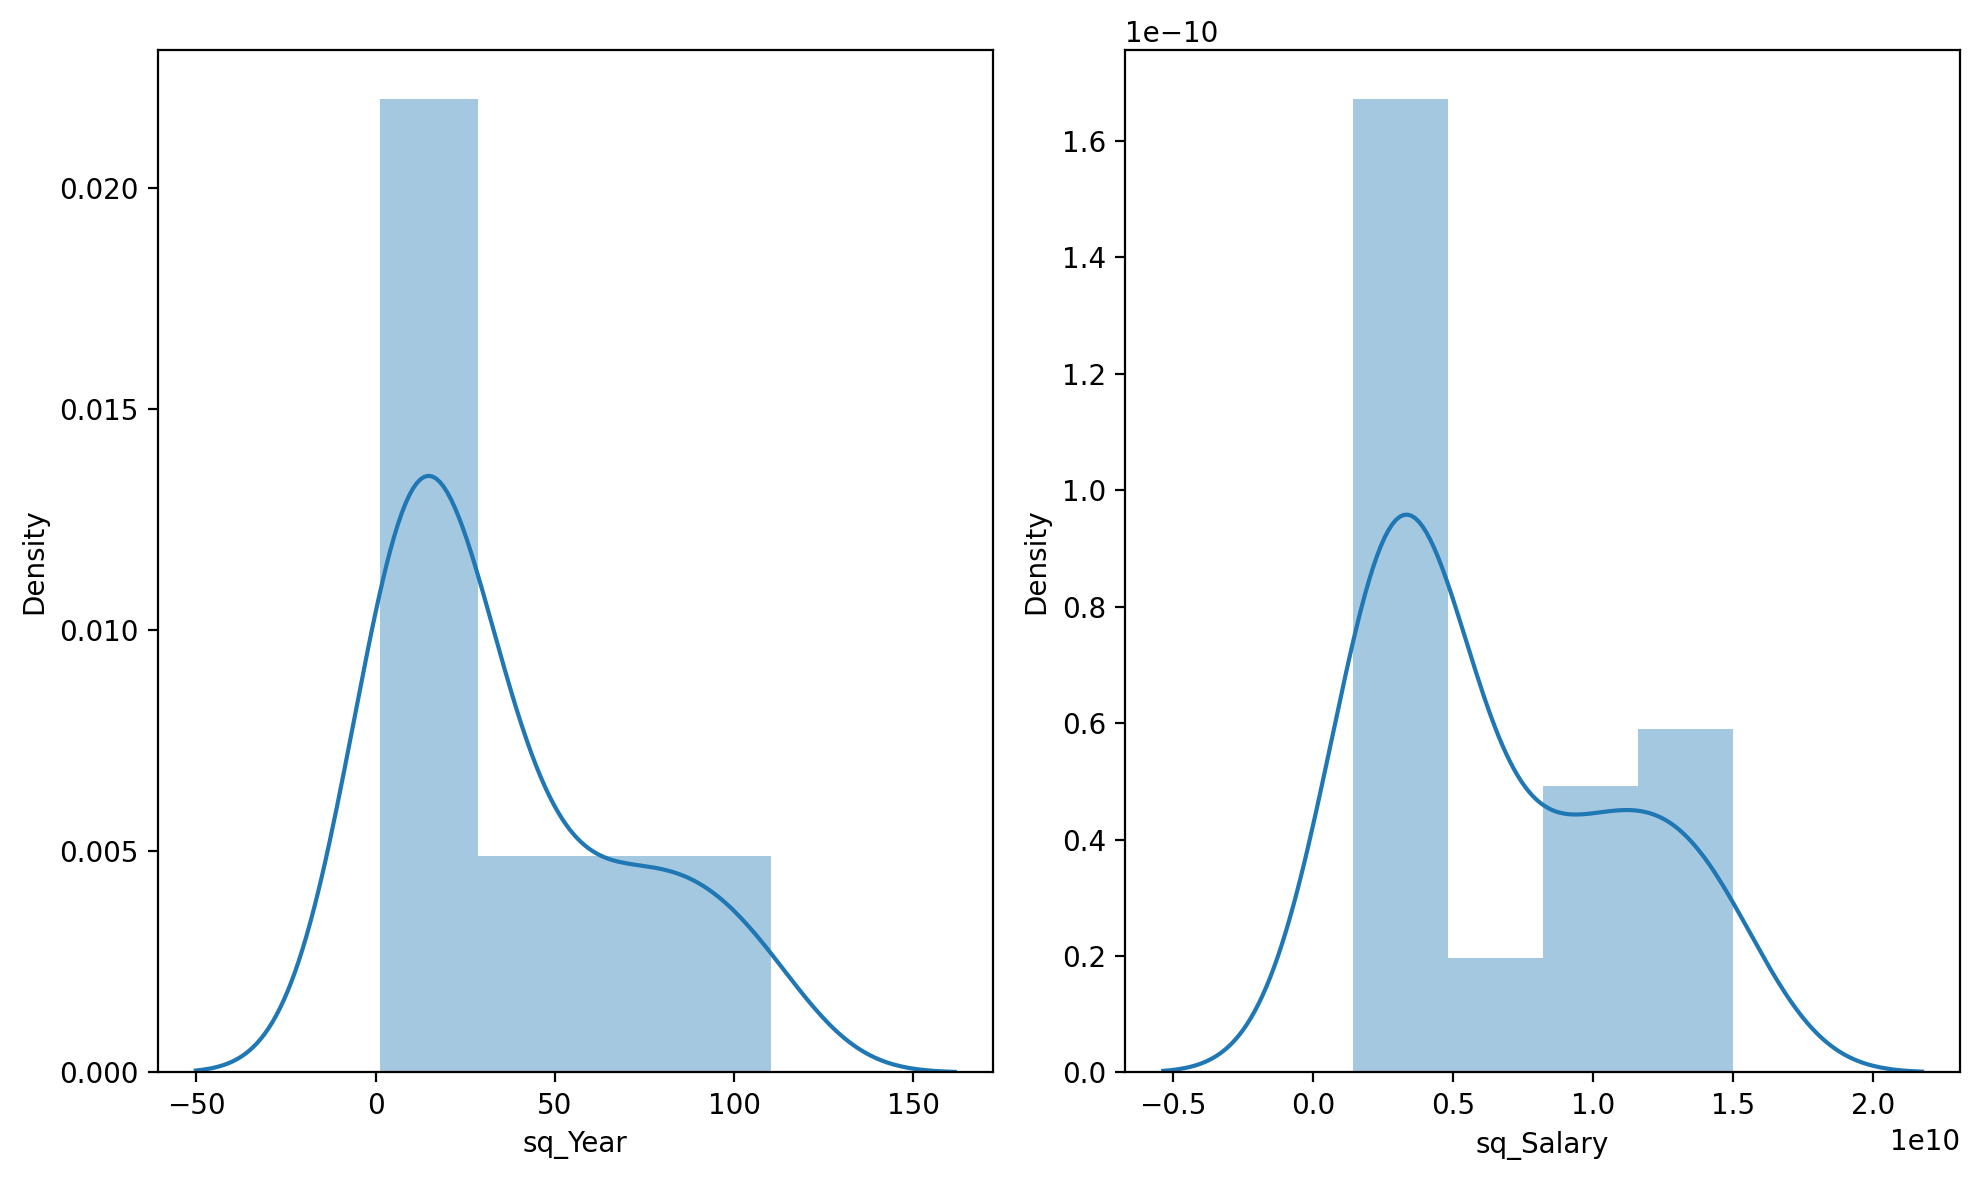

In [45]:
plt.subplot(1,2,1)
sns.distplot(df['sq_Year'])

plt.subplot(1,2,2)
sns.distplot(df['sq_Salary'])
plt.tight_layout()

In [46]:
print(df['sq_Year'].skew(), df['sq_Salary'].skew())

0.9449331187803115 0.6568711320115498


# Model Building

In [47]:
import statsmodels.formula.api as smf

In [48]:
 model = smf.ols('Salary~YearsExperience',data=df).fit()

In [50]:
c,m = model.params.round(4)
c,m

(25792.2002, 9449.9623)

# Line Equation

In [51]:
x=3.5
y= m*x +c
y

58867.06825

# R2 Value

In [53]:
model.rsquared

0.9569566641435086

# Prediction for new data

In [54]:
newd= pd.Series([1,2,3,4,4.4,2.5,3.6,7,6,9.5,1.2])
newd= pd.DataFrame(data=newd,columns=['YearsExperience'])
newd

,YearsExperience
0,1.0
1,2.0
2,3.0
3,4.0
4,4.4
5,2.5
6,3.6
7,7.0
8,6.0
9,9.5


In [56]:
newd['Salary']=model.predict(newd).round(4)
newd

,YearsExperience,Salary
0,1.0,35242.1625
1,2.0,44692.1248
2,3.0,54142.0872
3,4.0,63592.0495
4,4.4,67372.0344
5,2.5,49417.1060
6,3.6,59812.0646
7,7.0,91941.9364
8,6.0,82491.9741
9,9.5,115566.8423
